# 题目

1. 线性查找方法查找指定的值，并修改、删除值、插入值。数据为D1=[9,10,3,2,0,8,7,11,15]     
(1)查找8，修改为18    
(2)对D1进行从小到大排序    
(3)把5插入D1排序后正确的位置     
(4)删除第一个数9    
(5)输出D1的最后结果
2. 回溯法求迷宫所有的解

# 算法思想

<font color=red size=5> 线性：循环遍历 </font>    
<font color=red size=5> 二分：折中查找 </font>     
<font color=red size=5> 插值：公式分割查找 </font>    
<font color=red size=5> 斐波那契：斐波那契数列分割查找</font>    
<font color=red size=5> 分块：线性+索引max分块查找 </font>    
<font color=red size=5> 哈希：先递归分割，再递归返回 </font>      
<font color=red size=5> 回溯：先递归分割，再递归返回 </font> 
<font color=red size=5> 效率：线性> </font> 

# 线性查找

顺序查找（Sequential Search）又叫线性查找、遍历查找，是最基本的查找技术。它的查找过程为：从表中第一个（或最后一个）记录开始，逐个进行记录的关键字和给定值比较，如果某个记录的关键字和给定值相等，则查找成功，找到所查的记录。如果直到最后一个（或第一个）记录，其关键字和给定值比较都不等时，则表中没有所查的记录，查找不成功。    
时间复杂度：O（1）~O（n）,最快一次，最慢查找所有。    
跟数据排序无关

In [3]:
def LinearFind(arr,key):
    n=len(arr)
    i=0                 #从左边开始依次找
    while i<n:
        if arr[i]==key:
            return i    #返回找到元素的下标
        i+=1
    return -1            #没有找到元素
if __name__ == '__main__':
    s1=[100,22,44,0,2,492,3,20,38]
    key=5
    r=LinearFind(s1,key)
    print('待查找的元素列表',s1)
    if r!=-1 :
        print('元素%d找到，其下标为%d'%(key,r))
    else:
        print('元素%d没有找到'%(key))

待查找的元素列表 [100, 22, 44, 0, 2, 492, 3, 20, 38]
元素5没有找到


# 二分查找

二分查找也常被称为二分法或者折半查找，每次查找时通过将待查找区间分成两部分并只取一部分继续查找，将查找的复杂度大大减少。对于一个长度为 O(n) 的数组，二分查找的时间复杂度为 O(log n)。   
为了方便理解，我们以数组1, 2, 4, 5, 6, 7, 9, 12, 15, 19, 23, 26, 29, 34, 39，在数组中查找26为例，制作了一张查找过程图，其中low标示左下标，high标示右下标，mid标示中间值下标：      
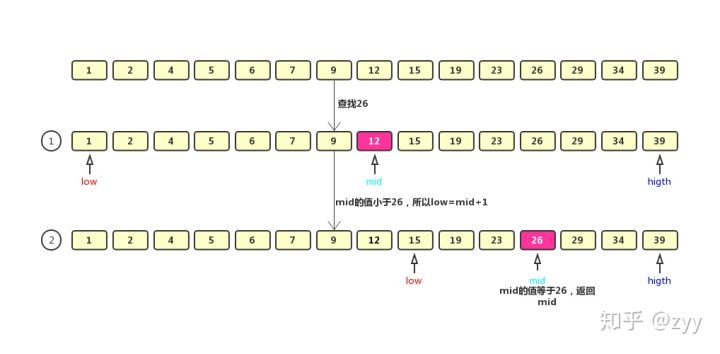
二分查找的过程就像上图一样，如果中间值大于查找值，则往数组的左边继续查找，如果小于查找值这往右边继续查找。二分查找的思想虽然非常简单，但是查找速度非常长，二分查找的时间复杂度为O(logn)。虽然二分查找的时间复杂度为O(logn)但是比很多O(1)的速度都要快，因为O(1)可能标示一个非常大的数值，比例O(1000)。我们来看一张二分查找与线性查找的效率对比图：   

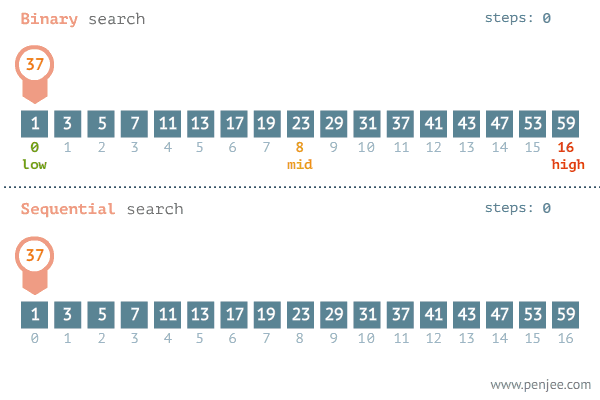

In [2]:
def BinaryRearch(arr,key):
    left=0           #左边界
    right=len(arr)   #右边界
    while left<=right:        #结束条件：有‘=’
        mid=(right-left)//2   #二分法中间位置
        if arr[left+mid]<key:      #key在右半范围
            left=left+mid+1
        elif arr[left+mid]>key:   #Key在左半范围
            right=left+mid-1
        else:
            return left+mid       #找到元素的下标值=right-mid
    return -1                    #没有找到
if __name__ == '__main__':
    s1=[0,2,3,5,8,9,12,30,40,50,55]
    print('查找列表',s1)
    key=55
    r=BinaryRearch(s1,key)
    if r==-1:
        print('列表里没有%d元素'%(key))
    else:
        print('在列表里找到元素%d，其下标为%d'%(key,r))

查找列表 [0, 2, 3, 5, 8, 9, 12, 30, 40, 50, 55]
在列表里找到元素55，其下标为10


# 插值查找

插值查找是一种在有序数组（前提条件）中查找某一特定元素的查找算法。插值查找基于二分查找，不同的是插值查找每次从自适应mid处开始查找，提高查找效率。
适用于分布比较均匀的数据。
二分查找查找点和插值查找查找点计算如下：     
插值查找点下标：  $int mid = low + \frac{key-a[low]}{a[high]-a[low]}*(high-low)$      
二分法查找点下标： $int mid = low + \frac{1}{2}*(high-low)$    
其中key为待查找元素，low为待查找区间左端，high为待查找区间右端，mid为自适应查找点。
插值查找将上述的比例参数1/2改进为自适应，根据待查找元素在整个有序数组中所处的位置，使mid值的变化更靠近待查找元素key，可以间接地减少了比较次数。

In [3]:
def ValueSearch(arr,key):
    i=0
    left=0
    right=len(arr)-1
    while left<right:       #没有=：分母不能为零！
        i+=1
        print('查找次数%d'%(i))
        mid=left+int((right-left)*(key-arr[left])/(arr[right]-arr[left]))
        if key<arr[mid]:    #左范围查找
            right=mid-1
        elif key>arr[mid]:  #右范围查找
            left=mid+1
        else:
            return mid     #返回查到元素的下标值，与二分区别：不是折中，而是套公式变化mid
    return -1              #若没有找到，则返回-1
s1=[0,3,5,7,9,20,30,40,50]
key=50
print('查询列表为',s1)
print('查询值为',key)
r=ValueSearch(s1,key)
if r==-1:
    print('%d没有找到'%(key))
else:
    print('查找值%d在列表里的下标值为%d'%(key,r))

查询列表为 [0, 3, 5, 7, 9, 20, 30, 40, 50]
查询值为 50
查找次数1
查找值50在列表里的下标值为8


# 斐波那契查找

斐波那契算法基本介绍：

1.黄金分割点是把一条线段分割为两部分，是其中一部分与全长之比等于另一部分与这部分之比，取其前三位数的近似值为0.618。由于按此比例设计的造型十分美丽，因此称为黄金分割
2.斐波那契数列{1，1，2，3，5，8，13，21，34，55}发现斐波那契数列的相邻两个数的比例，无限接近黄金分格值0.618
3.斐波那契工作原理：斐波那契查找与二分查找和插入查找原理非常相似，仅仅改变了中间节点（mid）的位置，mid不在是中间或者是插值得到，而是位于黄金分割点附近，即mid=low=F(k-1)-1(F代表斐波那契数列)
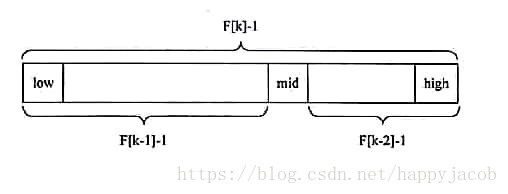
F（k-1）-1的理解：

1.通过斐波那契 数列F[k]=F[k-1]+F[k-2] 的性质，可以得到(F[k]-1)=(F[k-1]-1)+(F[k-2]-1)+1
该式说明：只要顺序表的长度为F[k]-1,则可以将表分为长度为F[k-1]-1和F[k-2]-1的两端。从而中间位置为 mid=low=F(k-1)-1
2.类似的每个子段也可以使用相同的方式分割
3.但是顺序表的长度n不一定刚好等于F[k]-1,所以需要将原来的顺序表长度n增加至F[k]-1。这里的k值只要能 使得F[k]-1恰好大于或等于n即可
时间复杂度：O(log n)
斐波那契查找的理念：让mid保持在数组的黄金分割点处，mid前面长度为F[K-1]-1，后面长度为F[K-2]-1，数组总长度为F[K]-1，mid在黄金分割点。

与二分查找比较：
斐波那契查找的平均性能比折半查找好；
但最坏情况下性能却比折半查找差；
它还有一个优点就是分割时只需进行加减运算。
与二分查找相比，斐波那契查找算法的明显优点在于它只涉及加法和减法运算，而不用除法。因此，斐波那契查找的平均性能要比折半查找好。

In [5]:
def FibonacciSearch(arr, key):
  # 求斐波那契列表
  n=len(arr)
  i=1
  F=[1,1,]        #存放生成的斐波那数
  while F[i]<=n:
      F.append(F[i-1]+F[i])   #生成的斐波那数
      i+=1
  print('生成的斐波那契数',F)
  left = 0
  right =n - 1
  # 为了满足斐波那契前后相邻数比，当右边数不够时，用最右边数补充缺的个数
  f =F[i]               #最右边的斐波那契数    
  print('生成的最右边的斐波那契数%d'%(f))
  i=0
  while i<f-n:          #补充数列右边不足的个数（后面最近的斐波那契数列-数列个数）
    arr.append(arr[right])
    i += 1
  print(arr)
  k=len(F)              #斐波那契数列元素个数
  t= 0                  #查找计数器
  while left <= right: #有“=”
    t += 1              #统计查找次数
    if k < 2:           #已有两数[1,1,]
      mid = left
    else:
      mid = left + F[k-1]-1 #中间下标
    print("left=%s, mid=%s, right=%s" % (left, mid, right))
    if key < arr[mid]:      #左半部分
      right = mid - 1       #范围右减一
      k -= 1
    elif key > arr[mid]:   #右半部分
      left = mid + 1       #范围左加一
      k -= 2               #跨过left、mid两个列表元素找下一次斐波那契数列
    else:
      print("查找次数: %s" % t)  
      if mid <= right:
          return mid
      else:               #mid>right：查找数为补充坐标时，去最右边坐标值
          return right
  print("查找次数: %s" % t)
  return False
#key=70
key=50
s1= [0,3,5,7,10,30,50,70,80,100]
r=FibonacciSearch(s1,key)
if r==False:
    print('数%d在列表里没有找到！')
else:
    print('查找数%d在列表里的下标为%d'%(key,r))

生成的斐波那契数 [1, 1, 2, 3, 5, 8, 13]
生成的最右边的斐波那契数13
[0, 3, 5, 7, 10, 30, 50, 70, 80, 100, 100, 100, 100]
left=0, mid=12, right=9
left=0, mid=7, right=11
left=0, mid=4, right=6
left=5, mid=6, right=6
查找次数: 4
查找数50在列表里的下标为6


# 分块查找

分块查找，又称为索引顺序查找，吸取了顺序查找和折半查找各自的优点，既有动态结构，又适合快速查找。    
基本思想：将查找表分为若干个子块。块内元素可以无序，但块之间是有序的，即第一个块中的最小关键字小于第二个块中的所有记录的关键字，第二个块中的最大关键字小于第三个块中的所有记录的关键字，以此类推。在建立一个索引表，索引表中的每个元素含有各块的最大关键字和各块中第一个元素的址，索引表按关键字有序排列。分块查找的过程分为两步：第一步在索引表中确定待查记录所在的块，可以顺序查找或者折半查找索引表；第二步在块内顺序查找。例如，关键字集合为{88,24,72,61,21,6,32,11,8,31,22,83,78,54}，按照关键码值为24、54、78、88，分为四个块和索引表：    
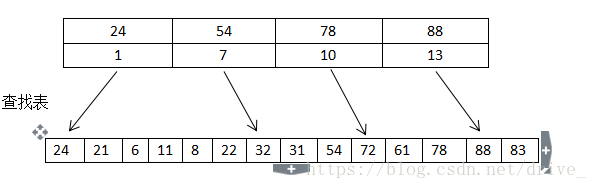    
分块查找的平均查找长度为索引查找和块内查找的平均长度之和，设索引查找和块内查找 的平均查找长度分别为L1，Ls，则分块查找的平均查找长度为：

                                                  ASL=L1+Ls    
设将长度为n的查找表均匀的分为b块，每块有s个记录，在等概率的情况下，若在块内和索引表中均采用顺序查找，则平均查找长度为:
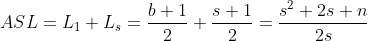
此时，若s=√n,则平均查找长度去最小值：√n+1;若对索引表采用折半查找时，则平均查找长度为：   

                                                ASL=L1+Ls=[log2(b+1)]+(s+1)/2      
两条件：分块值之间是顺序排列的（希尔排序）；块长度一致

In [4]:
def BlockSearch(arr,key,index,n):  #arr为待查找的列表，key为要查找关键值，index为块内最大值索引数列，n为块长度
    #先通过块最大值找出块范围
    B_max=-1
    j=0        #最大值索引下标
    for i in index:     #第j个块
        j+=1
        if key<=i:
            B_max=i
            break
    if B_max==-1:
        return -1                 #在块范围内没有该关键字值，结束查找
    #确定所在块
    print('块内最大值为%d'%(B_max))
    r=LinearFind(arr[(j-1)*n:(j*n-1)],key) #调用前面线性查找函数
    print('线性查找结果%d'%(r))
    if r==-1:
        return -1
    else:
        return (j-1)*n+r        #找到关键字值在列表里得下标
   
s1=[1,4,2,8,3,10,89,20,19,50,200,128,121,120,110]
index=[8,89,200]
key=2
r=BlockSearch(s1,key,index,5)
if r==-1:
    print('%d在列表里不存在'%(key))
else :
    print('%d在列表里的下标为%d'%(key,r))

块内最大值为8
线性查找结果2
2在列表里的下标为2


# 哈希查找

基础知识：    
散列表（Hash table，也叫哈希表），是根据关键码值(Key value)而直接进行访问的数据结构。也就是说，它通过把关键码值映射到表中一个位置来访问记录，以加快查找的速度。这个映射函数叫做散列函数，存放记录的数组叫做散列表。
给定表M，存在函数f(key)，对任意给定的关键字值key，代入函数后若能得到包含该关键字的记录在表中的地址，则称表M为哈希(Hash）表，函数f(key)为哈希(Hash) 函数。f(key)->address->value   
若关键字为k，则其值存放在f(k)的存储位置上。由此，不需比较便可直接取得所查记录。称这个对应关系f为散列函数，按这个思想建立的表为散列表。
对不同的关键字可能得到同一散列地址，即k1≠k2，而f(k1)=f(k2)，这种现象称为冲突（英语：Collision）。具有相同函数值的关键字对该散列函数来说称做同义词。综上所述，根据散列函数f(k)和处理冲突的方法将一组关键字映射到一个有限的连续的地址集（区间）上，并以关键字在地址集中的“像”作为记录在表中的存储位置，这种表便称为散列表，这一映射过程称为散列造表或散列，所得的存储位置称散列地址。
若对于关键字集合中的任一个关键字，经散列函数映象到地址集合中任何一个地址的概率是相等的，则称此类散列函数为均匀散列函数（Uniform Hash function），这就是使关键字经过散列函数得到一个“随机的地址”，从而减少冲突。    
1. 直接寻址法：取关键字或关键字的某个线性函数值为散列地址。即H(key)=key或H(key) = a·key + b，其中a和b为常数（这种散列函数叫做自身函数）。若其中H(key）中已经有值了，就往下一个找，直到H(key）中没有值了，就放进去。
2. 数字分析法：分析一组数据，比如一组员工的出生年月日，这时我们发现出生年月日的前几位数字大体相同，这样的话，出现冲突的几率就会很大，但是我们发现年月日的后几位表示月份和具体日期的数字差别很大，如果用后面的数字来构成散列地址，则冲突的几率会明显降低。因此数字分析法就是找出数字的规律，尽可能利用这些数据来构造冲突几率较低的散列地址。
3. 平方取中法：当无法确定关键字中哪几位分布较均匀时，可以先求出关键字的平方值，然后按需要取平方值的中间几位作为哈希地址。这是因为：平方后中间几位和关键字中每一位都相关，故不同关键字会以较高的概率产生不同的哈希地址。
4. 折叠法：将关键字分割成位数相同的几部分，最后一部分位数可以不同，然后取这几部分的叠加和（去除进位）作为散列地址。数位叠加可以有移位叠加和间界叠加两种方法。移位叠加是将分割后的每一部分的最低位对齐，然后相加；间界叠加是从一端向另一端沿分割界来回折叠，然后对齐相加。
5. 随机数法：选择一随机函数，取关键字的随机值作为散列地址，即H(key)=random(key)其中random为随机函数,通常用于关键字长度不等的场合。
6. 除留余数法：取关键字被某个不大于散列表表长m的数p除后所得的余数为散列地址。即 H(key) = key MOD p,p<=m。不仅可以对关键字直接取模，也可在折叠、平方取中等运算之后取模。对p的选择很重要，一般取素数或m，若p选的不好，容易产生同义词。  

哈希查找：   
哈希查找(Hash Search)，提前将数据进行分组(创建哈希表),然后根据分组的特征去相应的组里进行查找。注：哈希查找不包括创建哈希表的过程，后面在哈希表查找的过程才是哈希查找；先有哈希表，在进行哈希查找。如果对一批数据要进行反复的搜索，用哈希查找是很好的。

在查找以前先建哈希表(分组)：哈希散列函数，常用方法为求整取余(p=key%m，把m定成n值)，然后入表，把对应的值放在正确的位置上，但是假如说数据中有1个数字为1，一个数字为11，二者对m为10时，p都为1，那么现在这两个数字都应该在表中的同一个位置，这种情况叫做哈希冲突，解决哈希冲突的办法有两个。

第一个叫做开放定址法，你占了我的位置，我就去占别人的位置，假如11来了发现位置上有人，那么它如何才能去占别人的位置？方法一，线性探测，一个一个向后寻找空位置，如果连续太多，一时半会找不到位置，就有了第二个方法。线性补偿探测，有一个间隔，假如说间隔是3，每隔三个探测是否是空位，但是可能会造成死循环。第三个方法，线性探测再散列，间隔变成±1、±4、±9、±16 … … 先看1后面的位置有人吗？有人。1前面的位置有人吗？有人，1后面间隔为4的位置空余吗？空余，找到，以此类推，数据个数不足会循环进行。第二个叫拉链法，数据以链表形式链接下来，都在这同一个位置。

我们采用的就是拉链法来解决哈希冲突，数据为86、17、9、1、16、25、14、38、46、5；先分组，数据10个有10组，超过10组也可有能。哈希表如下，假如我们的想要查找元素为37，37%10=7；遍历p=7的这组(遍历链表)，发现没有37这个元素，查找失败。
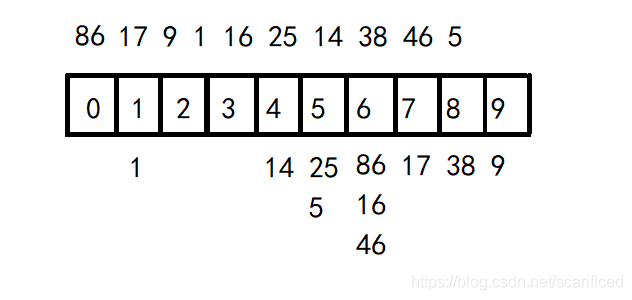

In [7]:
maxsize=20   #哈希表最大存放20个哈希值
HashTable={i:None for i in range(maxsize)} # 使用字典数据结构作为哈希表元素保存方法
print('哈希表大小为%d'%len(HashTable))

def Hash(value):   #哈希函数，采用留余数法求Address
    address=value%maxsize       #散列除留余数法求address
    if HashTable[address]==None:
        return address      #确定哈希地址
    else:                       #考虑键值冲突,试探下一个空值哈希表位置
        while address<maxsize:
            address+=1
            if HashTable[address]==None:
                return address
    return -1   #哈希表地址不够
    
    
def BuildHashTable(Values):     #根据哈希地址，存储哈希值，构建哈希表
    for value in Values:
        address=Hash(value)     #获取地址
        print('建立的键值对(%d %d)'%(address,value))
        if address!=-1:
            HashTable[address]=value
        else:                       #考虑键值冲突,+1试探下一个空值哈希表位置
            print('数值%d存放的哈希表地址不够！'%(value))                
    return HashTable
def FindValue(HashT,value):
    address=value%maxsize
    if HashT[address]==value:
        return True
    else:                      #地址冲突的情况
        address+=1 
        while address<maxsize:
            if HashT[address]==value:
                return True
            address+=1
    return False
   
s1=[20,30,1,2,5,8,23,44,48]
value=44
if FindValue(BuildHashTable(s1),value):
    print('在哈希表里找到%d'%(value))
else:
    print('在哈希表里找不到%d'%(value))

哈希表大小为20
建立的键值对(0 20)
建立的键值对(10 30)
建立的键值对(1 1)
建立的键值对(2 2)
建立的键值对(5 5)
建立的键值对(8 8)
建立的键值对(3 23)
建立的键值对(4 44)
建立的键值对(9 48)
在哈希表里找到44


# 回溯查找

回溯算法也叫试探法，它是一种系统地搜索问题的解的方法。回溯算法实际上一个类似枚举的搜索尝试过程，主要是在搜索尝试过程中寻找问题的解，当发现已不满足求解条件时，就“回溯”返回，尝试别的路径。回溯法是一种选优搜索法，按选优条件向前搜索，以达到目标。但当探索到某一步时，发现原先选择并不优或达不到目标，就退回一步重新选择，这种走不通就退回再走的技术为回溯法，而满足回溯条件的某个状态的点称为“回溯点”。许多复杂的，规模较大的问题都可以使用回溯法，有“通用解题方法”的美称。     

用回溯算法解决问题的一般步骤：
1. 针对所给问题，定义问题的解空间，它至少包含问题的一个（最优）解。
2. 确定易于搜索的解空间结构,使得能用回溯法方便地搜索整个解空间 。
3. 以深度优先的方式搜索解空间，并且在搜索过程中用剪枝函数避免无效搜索。

确定了解空间的组织结构后，回溯法就从开始结点（根结点）出发，以深度优先的方式搜索整个解空间。这个开始结点就成为一个活结点，同时也成为当前的扩展结点。在当前的扩展结点处，搜索向纵深方向移至一个新结点。这个新结点就成为一个新的活结点，并成为当前扩展结点。如果在当前的扩展结点处不能再向纵深方向移动，则当前扩展结点就成为死结点。此时，应往回移动（回溯）至最近的一个活结点处，并使这个活结点成为当前的扩展结点。回溯法即以这种工作方式递归地在解空间中搜索，直至找到所要求的解或解空间中已没有活结点时为止。   
方法：递归（易，效率慢）和非递归（复杂，效率高）

In [10]:
#非递归
def FindNext(m,record,r,c):    #判断当前节点的下一个节点解
    n=len(m)                   #有一个方向为通过则进行下一次试探
    if  c+1<n:                 #边界条件：在n范围内，试探往右走
        if record[r][c+1]==0:  #试探往右走,且没有走过的
            if m[r][c+1]==1:   #可行，标记1 
                record[r][c+1]=1
                return r,c+1   #返回新坐标
        else:                  #已经走过
            b_r,b_c=r,c+1      #记录上一个走过的坐标
    if r+1<n:
        if record[r+1][c]==0:  #在n范围内，试探往下走
            if m[r+1][c]==1:   #可行，标记1 
                record[r+1][c]=1
                return r+1,c   #返回新坐标
        else:                  #已经走过
            b_r,b_c=r+1,c      #记录上一个走过的坐标
    if r-1>=0:
        if record[r-1][c]==0:  #在n范围内，试探往左走
            if m[r-1][c]==1:   #可行，标记1 
                record[r-1][c]=1
                return r-1,c   #返回新坐标
        else:                  #已经走过
            b_r,b_c=r-1,c      #记录上一个走过的坐标
    if c-1>=0:
        if record[r][c-1]==0:  #在n范围内，试探往上走
            if m[r][c-1]==1:   #可行，标记1 
                record[r][c-1]=1
                return r,c-1   #返回新坐标
        else:                  #已经走过
            b_r,b_c=r,c-1      #记录上一个走过的坐标
    m[r][c]=0                  #走不通的路设置maze当前节点设置0，回溯
    if r+1==n and m[r][0]==0:  #在最后一行情况下第一列入口为死路，回溯到r,0位置（行终止）
        b_r,b_c=r+1,0          #准备所有试探回溯都结束
    return b_r,b_c             #返回走不通节点的前一节点坐标

def solution_maze(m,record):
    row,col=0,0                #记录行列坐标
    n=len(m)                   #长度
    i=0
    while i<n:
        if m[i][0]==1:
            row=i              #求得初始行
            record[i][0]=1       #标值走过
            break
        i+=1
    if i==n-1:
        print('第1列无入门地方，终止执行！')
    while i<n:        #回溯应无外部终止条件
        if (row<n and row>=0) and (col<n and col>=0): #当前坐标在范围之内
            if col==n-1:
                for one in record:
                    print(one)  #打印最后结果 
                return 0      #有了第一个解就退出
            row,col=FindNext(m,record,row,col)        
            if col==0:          #该行进去即为死路，回溯到开始位置
                i+=1            #从下一行开始求解
                row=i
    return 0
if __name__ == '__main__': 
    maze = [[0, 1, 0, 1, 1, 1, 1, 1, 0],
            [1, 1, 0, 1, 0, 1, 0, 1, 1],
            [0, 1, 1, 1, 0, 1, 0, 0, 0],
            [0, 1, 0, 0, 1, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 1, 1],
            [0, 0, 1, 0, 0, 0, 1, 0, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 1],
            [0, 1, 1, 0, 0, 0, 0, 0, 1],
            [1, 0, 1, 0, 0, 0, 0, 0, 1]]           
    n=len(maze)
    recordPath=[([0]*n) for _ in range(n)] #产生n阶零矩阵
    solution_maze(maze,recordPath)

[0, 0, 0, 1, 1, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
#题目1
#(1)查找8，修改为18    
def LinearFind(arr,key,new):
    n=len(arr)
    i=0                 #从左边开始依次找
    while i<n:
        if arr[i]==key:
            D1[i]=new
            return 0    
        i+=1
    return -1            #没有找到元素

D1=[9,10,3,2,0,8,7,11,15]
key=8
new=18
print('待查找的元素列表',D1)
r=LinearFind(D1,key,new)
if r!=-1 :
    print('元素%d找到，其下标为%d'%(key,r))
else:
    print('元素%d没有找到'%(key))
print('修改后：')    
D1    

待查找的元素列表 [9, 10, 3, 2, 0, 8, 7, 11, 15]
元素8找到，其下标为0
修改后：


[9, 10, 3, 2, 0, 18, 7, 11, 15]

In [34]:
#题目1  
#(2)对D1进行从小到大排序    
#采用冒泡排序      
def bubbleSort(D1):  #或者直接内置函数sorted()
    n=len(D1)
    for i in range(n-1):            #比较n-1轮
        for j in range(n-i-1):    #倒序：每轮比较n-i-1次；正序：range（i，n-1）
            if D1[j]>D1[j+1]:
                c1=D1[j]
                D1[j]=D1[j+1]
                D1[j+1]=c1           #D1[j],D1[j+1]=D1[j+1],D1[j]
bubbleSort(D1)
print('排序后的数列：',D1)

排序后的数列： [0, 2, 3, 7, 9, 10, 11, 15, 18]


In [36]:
#题目1  
#(3)把5插入D1排序后正确的位置     
def Insert(D1):
    a=5
    n=len(D1)
    if D1[0]>a:
        D1.insert(0,a)
        return 0
    if D1[-1]<a:
        D1.append(a)
        return 0
    for i in range(n-1):         #第二个数到倒数第二个数遍历
        if D1[i]<a and D1[i+1]>a:
             D1.insert(i+1,a)
Insert(D1)
print('插入后的数列：',D1)

插入后的数列： [0, 2, 3, 5, 7, 9, 10, 11, 15, 18]


In [41]:
#题目1  
#(4)删除第一个数9    
#(5)输出D1的最后结果
def Delete(arr):
    n=len(arr)
    i=0     #从左边开始依次找
    while i<n:
        if arr[i]==key:
            del(arr[i])    #删除找到的元素or pop(arr[i])
            return i     #返回找到元素的下标
        i+=1
    return -1            #没有找到元素
key=9
r=Delete(D1)
if r!=-1 :
    print('元素%d找到，其下标为%d'%(key,r))
    print('删除后的数列：',D1)
else:
    print('元素%d没有找到'%(key)) 

元素9找到，其下标为5
删除后的数列： [0, 2, 3, 5, 7, 10, 11, 15, 18]


In [11]:
#题目2
def solution_maze(m,record):
    row,col=0,0
    n=len(m)                   #长度
    i=0
    flag=False                #引入flag，将第一列入口处走完，提前记录
    while i<n:
        if m[i][0]==1:
            row=i              #求得初始行
            record[i][0]=1     #标值1为走过节点
            flag=True
        i+=1
    if not flag:
        print('第1列无入门地方，终止执行！')
        return 0
    i=0
    while i<n:
        if record[i][0]==0:      #从头开始回溯
            i+=1
            row=i
            continue
        if (row<n and row>=0) and (col<n and col>=0): #当前坐标在范围之内
            if col==n-1:            #回溯到最后一列（出口处）
                col=0                #
                i+=1                #从下一行开始求解
                continue
            row,col=FindNext(m,record,row,col)        
            if col==0:          #回溯到开始位置
                if row<n:
                    i+=1            #从下一行开始求解
                    row=i
                else:               #最后一行为死路，就不用搜索了
                    record[i][0]=0
    return 0
if __name__ == '__main__': 
    maze = [[0, 1, 0, 1, 1, 1, 1, 1, 0],
            [1, 1, 0, 1, 0, 1, 0, 1, 1],
            [0, 1, 1, 1, 0, 1, 0, 0, 0],
            [0, 1, 0, 0, 1, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 1, 1],
            [0, 0, 1, 0, 0, 0, 1, 0, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 1],
            [0, 1, 1, 0, 0, 0, 0, 0, 1],
            [1, 0, 1, 0, 0, 0, 0, 0, 1]]           
    n=len(maze)
    recordPath=[([0]*n) for _ in range(n)] 
    solution_maze(maze,recordPath)
recordPath

[[0, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]